Let's start by importing the packages and modules used in this notebook.

In [1]:
import dkmri
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

Then, let's load a dataset to work on. Replace the code below with code that loads your data.

Note that it is very important to scale the b-values to units of ms/μm^2!

In [2]:
data = nib.load("data.nii.gz").get_fdata()
bvals = np.loadtxt("data.bval") * 1e-3  # Must be in units of ms/μm^2!
bvecs = np.loadtxt("data.bvec").T
mask = nib.load("mask.nii.gz").get_fdata().astype(bool)

The diffusion kurtosis imaging signal model can be fit to data using the function `dkmri.fit`. The docstring contains important information about the function:

In [7]:
dkmri.fit?

Signature: dkmri.fit(data, bvals, bvecs, mask=None, alpha=None, quiet=False)
Docstring:
Estimate diffusion and kurtosis tensor elements.

This function does the following:

    1. Remove infinities, nans, and negative values, and normalize data.
    2. Estimate DKI model parameters using standard NLLS.
    3. Train a multilayer perceptron to predict kurtosis measures from data
       in voxels where the apparent kurtosis coefficient estimated by the
       NLLS fit was > 0 and < 10 along all directions.
    4. Estimate model parameters using regularized NLLS where the
       regularization terms increase the objective function value when
       MK, AK, and RK deviate from their predicted values. Axially
       symmetric tensors with plausible magnitudes are used as initial
       positions for the fit.

Parameters
----------
data : numpy.ndarray
    Floating-point array with shape (..., number of acquisitions).
bvals : numpy.ndarray
    Floating-point array with shape (number of acquis

`dkmri` contains the following functions for calculating parameter maps: `params_to_ad`, `params_to_ak`, `params_to_fa`, `params_to_md`, `params_to_mk`, `params_to_rd`, and `params_to_rk`. In addition, we can use the function `signal` to compute the signal from the estimated parameters.

Let's fit the model to data and show some parameter maps. 

/home/leevi/Dropbox/UCL/dkmri/dkmri/dkmri.py:723: RuntimeWarning: overflow encountered in exp
  S_hat = np.exp(design_matrix @ params[..., np.newaxis])[..., 0]


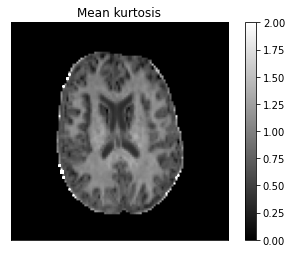

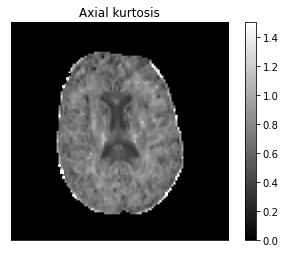

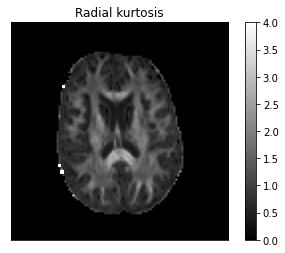

In [8]:
params, fit_status, mk_pred, ak_pred, rk_pred = dkmri.fit(
    data, bvals, bvecs, mask, quiet=True
)

z = 40

mk = dkmri.params_to_mk(params, mask)
plt.imshow(np.rot90(mk[..., z]), vmin=0, vmax=2, cmap="gray")
plt.colorbar()
plt.title("Mean kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

ak = dkmri.params_to_ak(params, mask)
plt.imshow(np.rot90(ak[..., z]), vmin=0, vmax=1.5, cmap="gray")
plt.colorbar()
plt.title("Axial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

rk = dkmri.params_to_rk(params, mask)
plt.imshow(np.rot90(rk[..., z]), vmin=0, vmax=4, cmap="gray")
plt.colorbar()
plt.title("Radial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()